In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Display the first few rows of the dataframe
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
overall_survival_rate = df['survived'].mean()
overall_survival_rate


0.3838383838383838

In [3]:
# Survival rate by passenger class
class_survival_rate = df.groupby('pclass')['survived'].mean()

# Survival rate by sex
sex_survival_rate = df.groupby('sex')['survived'].mean()

# Define age groups
age_bins = [0, 12, 18, 30, 50, 80]
age_labels = ['0-12', '13-18', '19-30', '31-50', '51-80']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Survival rate by age group
age_group_survival_rate = df.groupby('age_group')['survived'].mean()

class_survival_rate, sex_survival_rate, age_group_survival_rate


(pclass
 1    0.629630
 2    0.472826
 3    0.242363
 Name: survived, dtype: float64,
 sex
 female    0.742038
 male      0.188908
 Name: survived, dtype: float64,
 age_group
 0-12     0.579710
 13-18    0.428571
 19-30    0.355556
 31-50    0.423237
 51-80    0.343750
 Name: survived, dtype: float64)

In [4]:
# Distribution of passengers across classes
class_distribution = df['pclass'].value_counts(normalize=True)

# Survival rates by passenger class
class_survival_rate = df.groupby('pclass')['survived'].mean()

class_distribution, class_survival_rate


(3    0.551066
 1    0.242424
 2    0.206510
 Name: pclass, dtype: float64,
 pclass
 1    0.629630
 2    0.472826
 3    0.242363
 Name: survived, dtype: float64)

In [5]:
# Mean, median, and range of ages
age_mean = df['age'].mean()
age_median = df['age'].median()
age_range = (df['age'].min(), df['age'].max())

# Age and survival rate
age_survival_correlation = df[['age', 'survived']].corr().iloc[0,1]

age_mean, age_median, age_range, age_survival_correlation


(29.69911764705882, 28.0, (0.42, 80.0), -0.07722109457217757)

In [6]:
# Summary statistics of fare by class
fare_by_class = df.groupby('pclass')['fare'].describe()

# Fare and survival rate
fare_survival_correlation = df[['fare', 'survived']].corr().iloc[0,1]

fare_by_class, fare_survival_correlation


(        count       mean        std  min       25%      50%   75%       max
 pclass                                                                     
 1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
 2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
 3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500,
 0.25730652238496265)

In [7]:
# Define family size
df['family_size'] = df['sibsp'] + df['parch'] + 1  # Including the passenger themselves

# Survival rate by family size
family_size_survival_rate = df.groupby('family_size')['survived'].mean()

family_size_survival_rate


family_size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: survived, dtype: float64

In [8]:
# Survival rates based on embarkation points
embark_survival_rate = df.groupby('embarked')['survived'].mean()

embark_survival_rate


embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64

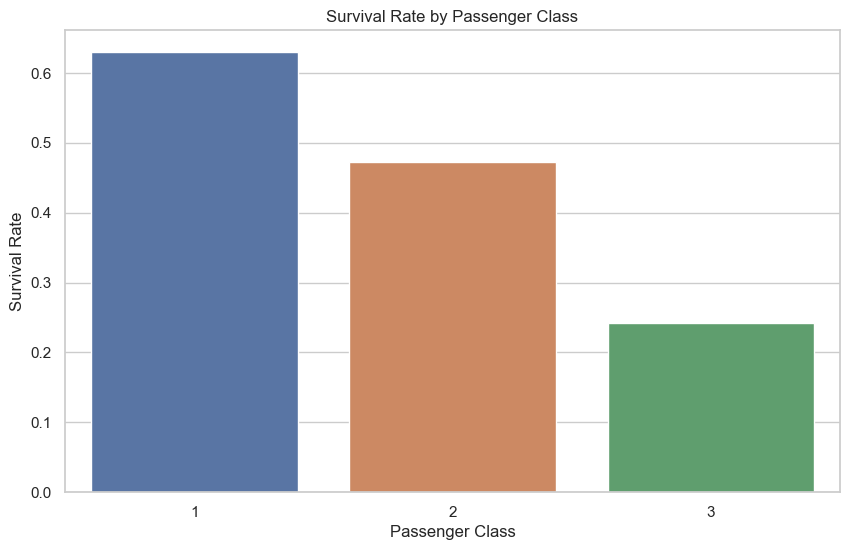

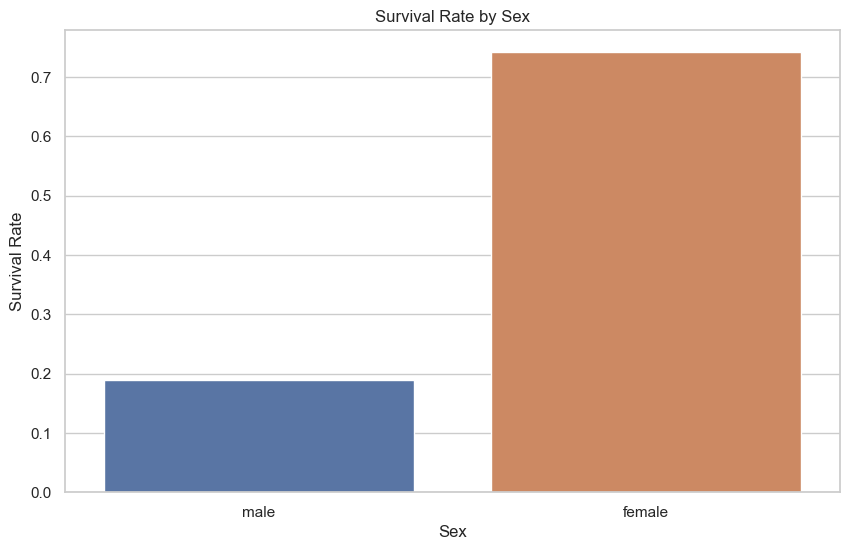

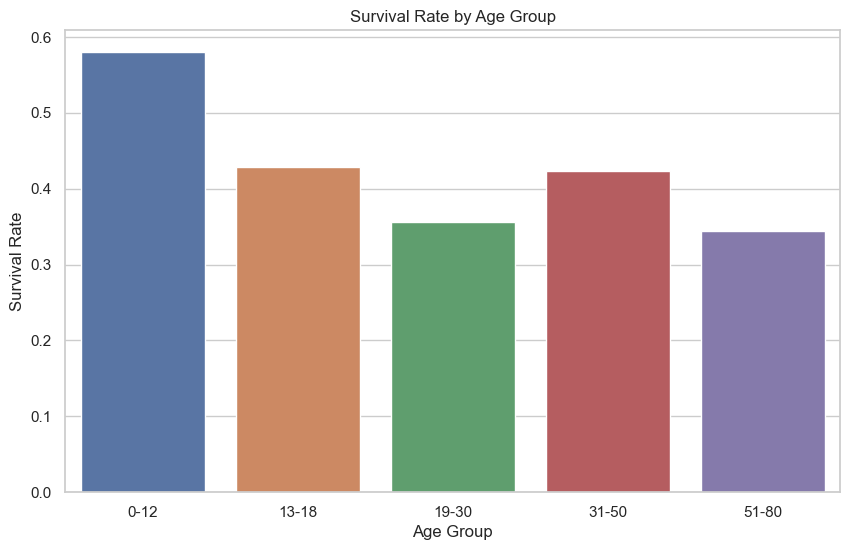

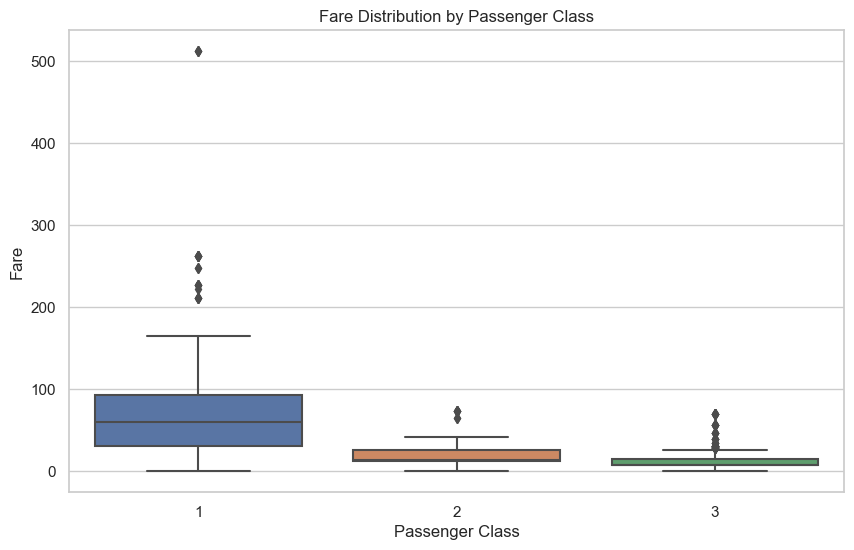

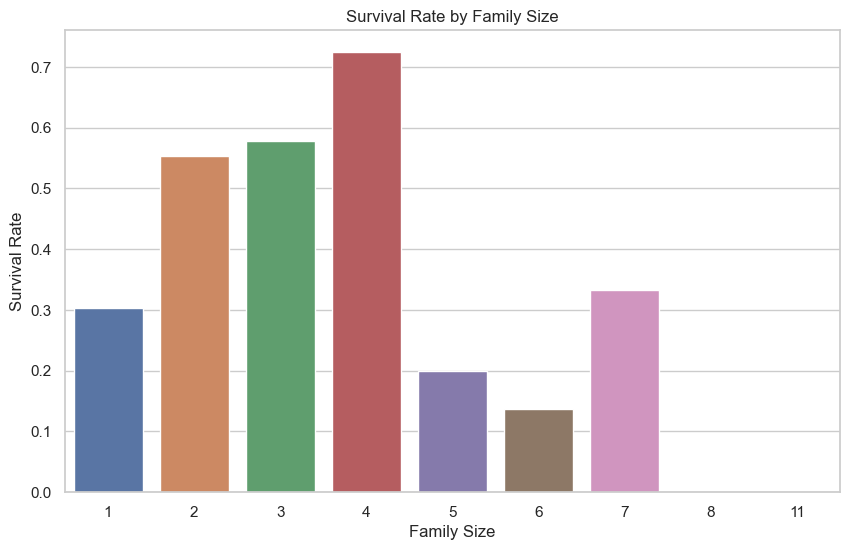

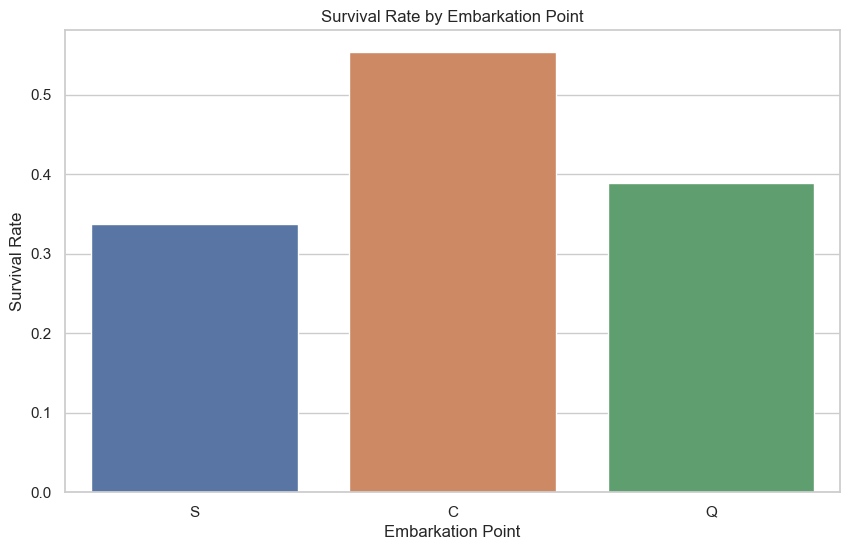

In [10]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Visualization for survival rates by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', data=df, errorbar=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

# Visualization for survival rates by sex
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='survived', data=df, errorbar=None)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.show()

# Visualization for survival rates by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='survived', data=df, errorbar=None)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()

# Visualization for fare distribution by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.ylabel('Fare')
plt.xlabel('Passenger Class')
plt.show()

# Visualization for survival rates by family size
plt.figure(figsize=(10, 6))
sns.barplot(x='family_size', y='survived', data=df, errorbar=None)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.show()

# Visualization for survival rates by embarkation point
plt.figure(figsize=(10, 6))
sns.barplot(x='embarked', y='survived', data=df, errorbar=None)
plt.title('Survival Rate by Embarkation Point')
plt.ylabel('Survival Rate')
plt.xlabel('Embarkation Point')
plt.show()
